In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def get_month(y):
    key_list=["F","G","H","J","K","M","N","Q","U","V","X","Z"]
    return key_list.index(y)+1
  
def convert_month(y):
    key_list=["F","G","H","J","K","M","N","Q","U","V","X","Z"]
    return key_list[y-1]

'''
Assumptions:
    Roll @ 10th or early if not available in the data.
    
'''
def strip_generator(mydate):
    #get month # get date , if the day is <12, this month otherwise nect month is the first

    year=mydate.year
    month=mydate.month
    day=mydate.day

    contract_main="1FCPO"
    if day<=12:
        f_month=(month)
    else:
        f_month=(month+1)
    next_months=[x+f_month for x in range(8)]
    month_keys=([convert_month(y) for y in [12 if x==12 else x%12 for x in next_months]])
    

    y_list=[]
    for m in range(len(month_keys)):
        if m==0:
            if month_keys[m]=="F" and month==12:
                yy=year+1
            else:
                yy=year
            y_list.append(yy)
        else:
            if month_keys[m]=="F":
                yy=y_list[-1]+1
            else:
                yy=y_list[-1]
            y_list.append(yy)
    res_list=[]
    for a,b in zip(month_keys,y_list):
        aa=str(contract_main)+str(a)+str(b)[3]
        res_list.append(aa)


    return res_list
        

            
        

## APEX and MALESIA
https://www.asiapacificex.com/ (newly established)

http://www.bursamalaysia.com/market/derivatives/products/commodity-derivatives/crude-palm-oil-futures-fcpo/
## STRUCTURES

-First 6 Flies
-First 5 Double Fly
-First 5 Condor



## CORRELATIONS WITH OIL AND SOYBEAN OIL
https://www.cmegroup.com/trading/agricultural/files/spreading-cbot-soybean-oil-and-bmd-crude-palm-oil.pdf

#Fly correlations
#Spot Correlations

In [5]:



start = datetime.datetime.strptime("01-01-2016", "%d-%m-%Y")
end = datetime.datetime.strptime("15-02-2019", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

strip_list=[]
ss_list=[]
for x in date_generated:
    res=strip_generator(x)
    ss_list.append([x for x in res])
    res.append(x)
    strip_list.append(res)
raw_data=pd.read_csv('PALMOIL_UTC_H1.csv.gz').dropna()



MAIN_FRAME=pd.DataFrame()
MAIN_FRAME["DATE"]=date_generated
MAIN_FRAME["UTC_DATE"]=pd.to_datetime(MAIN_FRAME["DATE"])+pd.Timedelta(hours=18)-pd.Timedelta(hours=8)
MAIN_FRAME=MAIN_FRAME.set_index(["DATE"])
CONTRACT_FRAME=pd.DataFrame(strip_list,columns=["1_PALM","2_PALM","3_PALM","4_PALM","5_PALM","6_PALM","7_PALM","8_PALM","DATE"])
CONTRACT_FRAME=CONTRACT_FRAME.set_index(["DATE"])
MAIN_FRAME=MAIN_FRAME.join(CONTRACT_FRAME)
MAIN_FRAME=MAIN_FRAME.reset_index()
MAIN_FRAME["DATE"]=pd.to_datetime(MAIN_FRAME["DATE"])
raw_data['Date']=pd.to_datetime(raw_data['Date-Time'])



    



MAIN_FRAME=MAIN_FRAME.dropna()

MAIN_FRAME=MAIN_FRAME.drop(['UTC_DATE'],axis=1)


start = datetime.datetime.strptime("01-01-2016", "%d-%m-%Y")
end = datetime.datetime.strptime("15-02-2019", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(hours=x) for x in range(0,30000)]


FRAME=pd.DataFrame()
FRAME['TIME']=date_generated

FRAME['DATE']= pd.DatetimeIndex(FRAME.TIME).normalize()
FRAME=FRAME.set_index(['DATE'])
MAIN_FRAME=MAIN_FRAME.set_index(['DATE'])

FRAME=FRAME.join(MAIN_FRAME)

PALM_DATA=pd.read_csv('PALMOIL_UTC_H1.csv.gz').dropna()


PALM_DATA['DATETIME']=PALM_DATA['Date-Time'].map(str)
PALM_DATA=PALM_DATA[['#RIC','Volume','Close Bid','Close Ask','DATETIME']]
PALM_DATA["DATE"]=PALM_DATA["DATETIME"].str.split('T',expand=True)[0]
PALM_DATA["TIME"]=PALM_DATA["DATETIME"].str.split('T',expand=True)[1]
PALM_DATA["TIME"]=PALM_DATA["TIME"].str.split('.',expand=True)[0]
PALM_DATA['DATETIMEZ']=pd.to_datetime(PALM_DATA['DATE'] + ' ' + PALM_DATA['TIME'])
PALM_DATA=PALM_DATA.drop(['DATE','TIME','DATETIME'],axis=1)
FRAME=FRAME.reset_index(drop=True)
FRAME['TIME']=FRAME['TIME'].map(str)
PALM_DATA['DATETIMEZ']=PALM_DATA['DATETIMEZ'].map(str)


for x in range(1,9):
    FRAME['IND_'+str(x)]=FRAME[str(x)+'_PALM']+'_'+FRAME['TIME']
PALM_DATA['IND']=PALM_DATA['#RIC']+'_'+PALM_DATA['DATETIMEZ']
PALM_DATA=PALM_DATA.set_index(['IND'])
#PALM_DATA=PALM_DATA.drop(['#RIC','DATETIMEZ'],axis=1)
FRAME=FRAME.dropna()

for x in range(1,9):

    FRAME=FRAME.set_index(['IND_'+str(x)])

    FRAME=FRAME.join(PALM_DATA,rsuffix=str(x)+'_')

    FRAME=FRAME.reset_index(drop=True)


FRAME["COUNTNULL"]=FRAME.isnull().sum(axis=1)    

FRAME=FRAME[FRAME["COUNTNULL"]!=40]
FRAME['TIME']=pd.to_datetime(FRAME['TIME'])  
FRAME=FRAME.reset_index()
FRAME=FRAME.set_index(['TIME'])
FRAME['CC']=FRAME[['1_PALM']].applymap(hash).diff()
FRAME['CCT']=0
FRAME['CCT']=np.where(FRAME['CC']==0,0,1)
FRAME['Close Ask1_']=FRAME['Close Ask']
FRAME['Close Bid1_']=FRAME['Close Bid']
FRAME['Volume1_']=FRAME['Volume']




FRAME

index   1_PALM   2_PALM   3_PALM   4_PALM   5_PALM  \
TIME                                                                      
2016-02-15 02:00:00   1082  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-15 03:00:00   1083  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-15 04:00:00   1084  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-15 07:00:00   1087  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-15 08:00:00   1088  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-15 09:00:00   1089  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-16 02:00:00   1106  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-16 03:00:00   1107  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-16 04:00:00   1108  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-16 07:00:00   1111  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-16 08:00:00   1112  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-16 09:00:00   1113  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-17 02:00:00   1130  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-17 03:00:00   1131  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-17 04:00:00   1132  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-17 07:00:00   1135  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-17 08:00:00   1136  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-17 09:00:00   1137  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-18 02:00:00   1154  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-18 03:00:00   1155  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-18 04:00:00   1156  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-18 07:00:00   1159  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-18 08:00:00   1160  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-18 09:00:00   1161  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-19 02:00:00   1178  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-19 03:00:00   1179  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-19 04:00:00   1180  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-19 07:00:00   1183  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-19 08:00:00   1184  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
2016-02-19 09:00:00   1185  1FCPOH6  1FCPOJ6  1FCPOK6  1FCPOM6  1FCPON6   
...                    ...      ...      ...      ...      ...      ...   
2019-02-08 08:00:00  27224  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-08 09:00:00  27225  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-11 02:00:00  27290  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-11 03:00:00  27291  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-11 04:00:00  27292  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-11 06:00:00  27294  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-11 07:00:00  27295  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-11 08:00:00  27296  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-11 09:00:00  27297  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-12 02:00:00  27314  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-12 03:00:00  27315  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-12 04:00:00  27316  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-12 06:00:00  27318  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-12 07:00:00  27319  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-12 08:00:00  27320  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-12 09:00:00  27321  1FCPOG9  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9   
2019-02-13 02:00:00  27338  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9  1FCPON9   
2019-02-13 03:00:00  27339  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9  1FCPON9   
2019-02-13 04:00:00  27340  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9  1FCPON9   
2019-02-13 06:00:00  27342  1FCPOH9  1FCPOJ9  1FCPOK9  1FCPOM9  1FCPON9   
2019-02-13 07:00:00  27343  1FCPOH9  1FCPOJ9  

## Flies

########################################################################################################################################################################################################
1 FLY


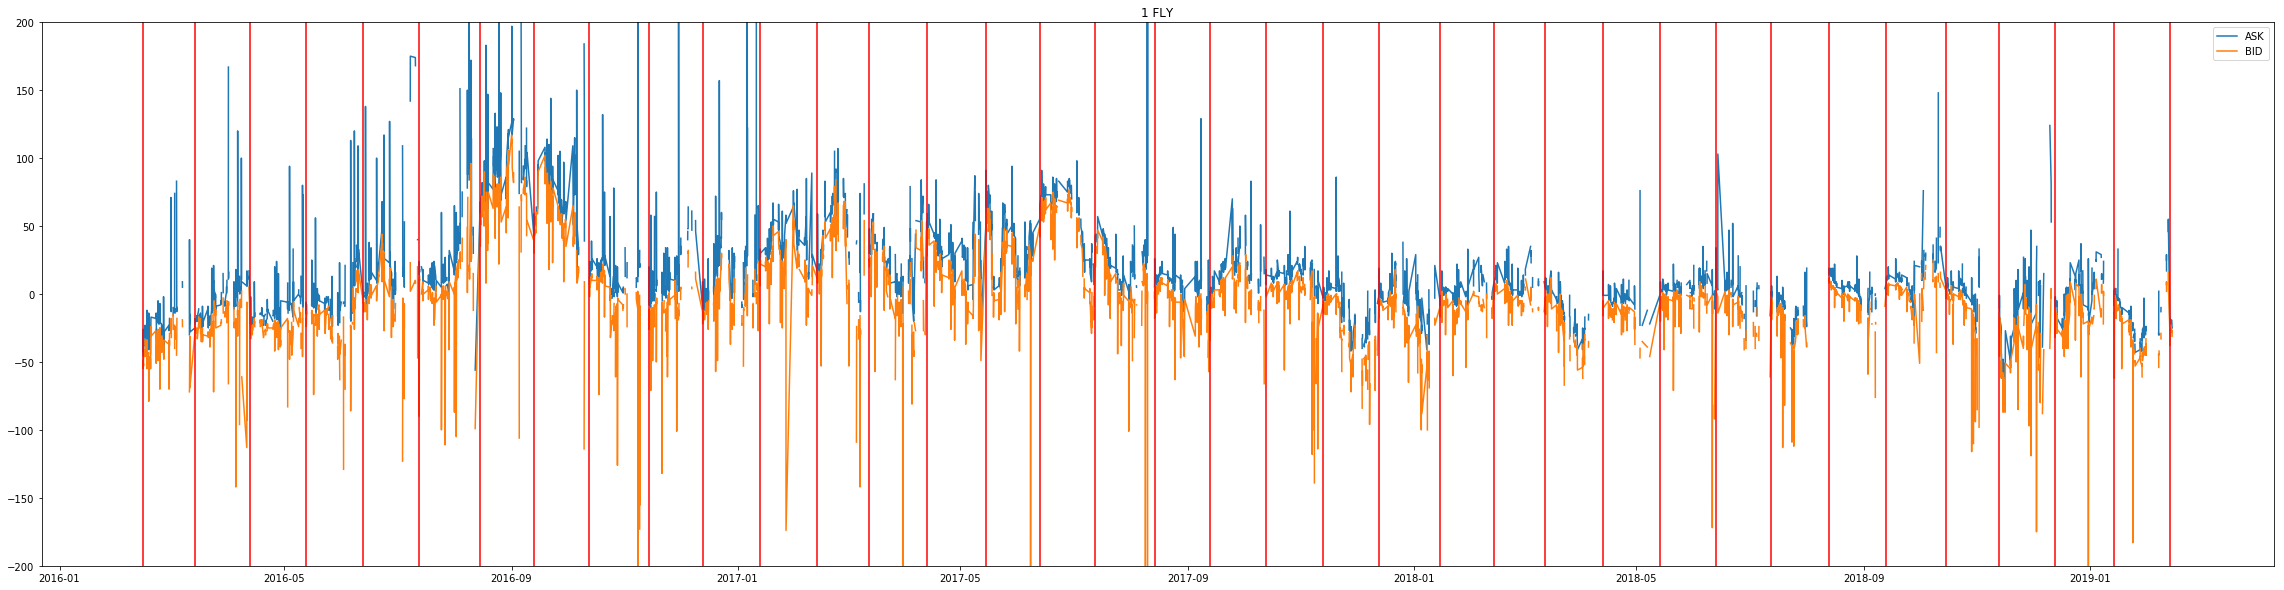

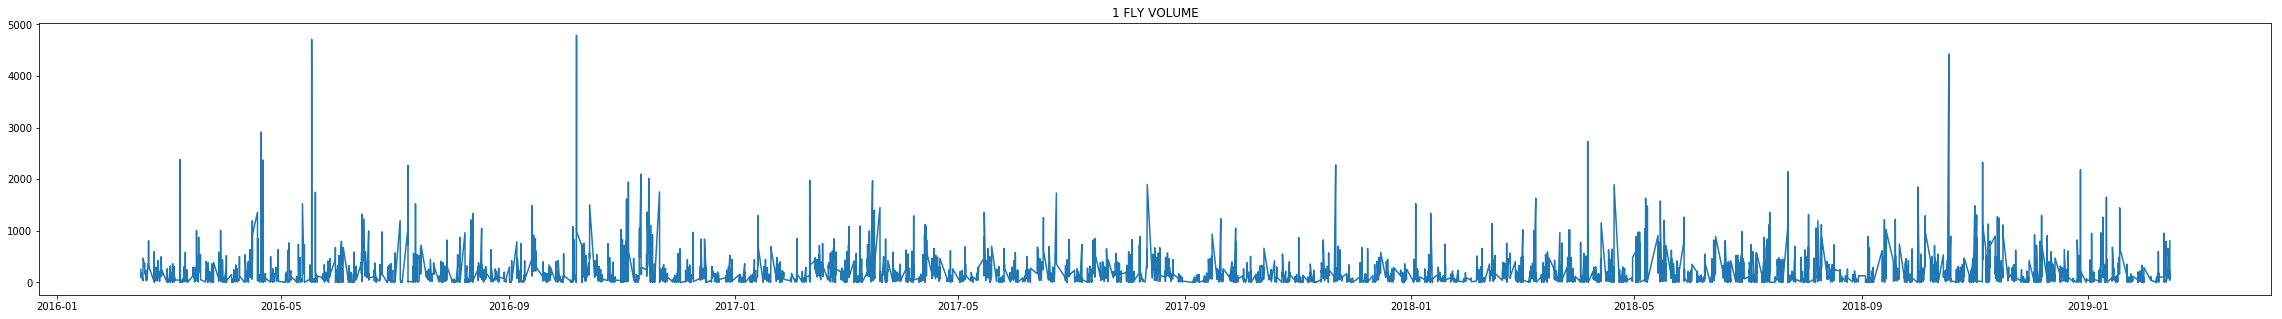

########################################################################################################################################################################################################
2 FLY


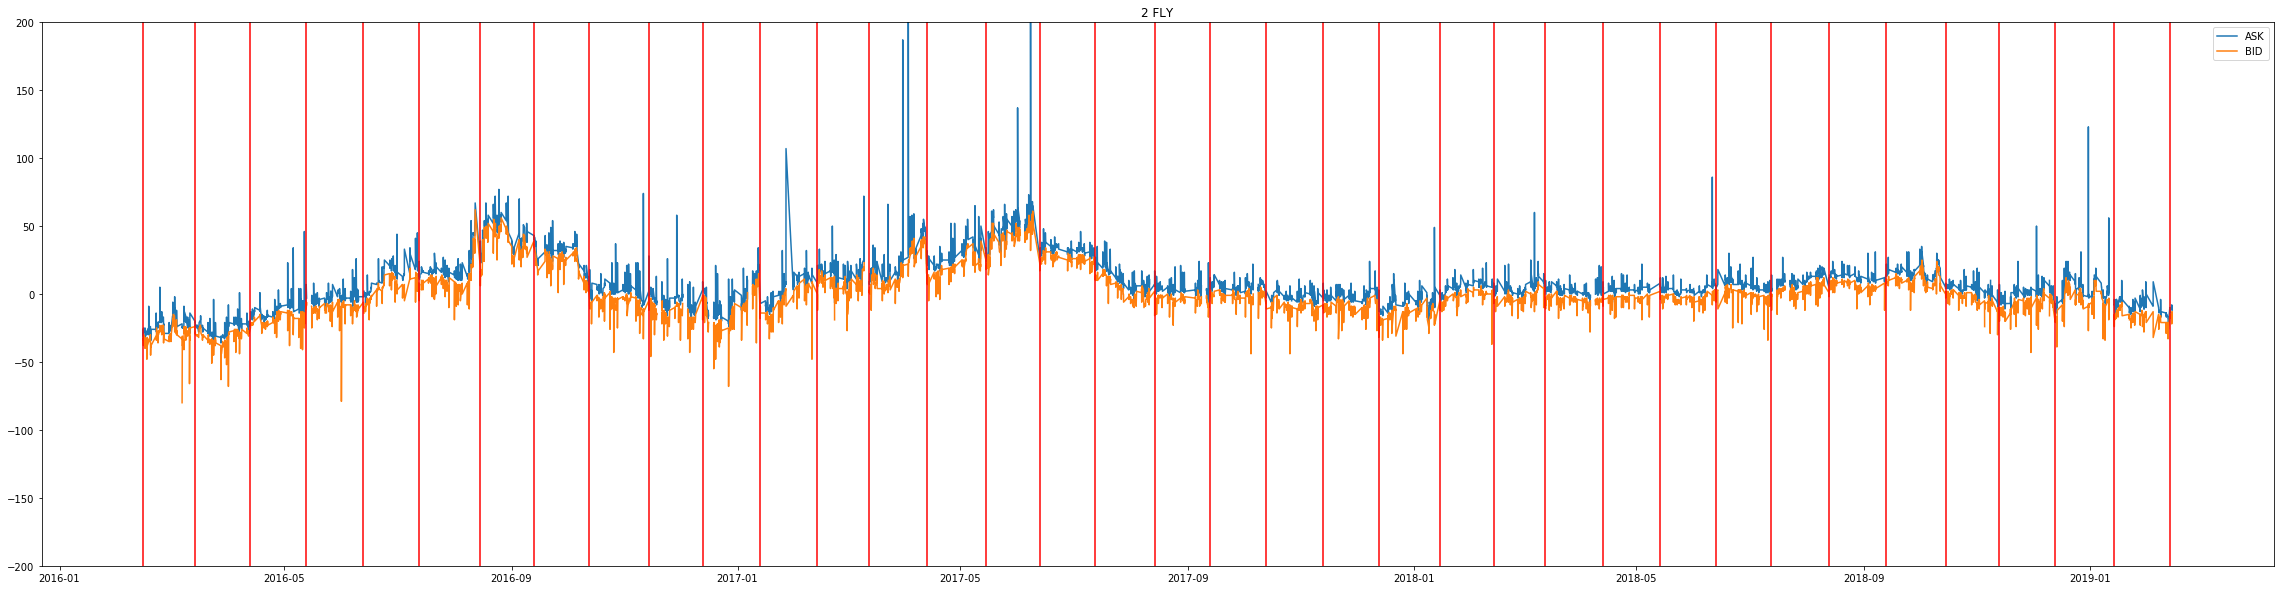

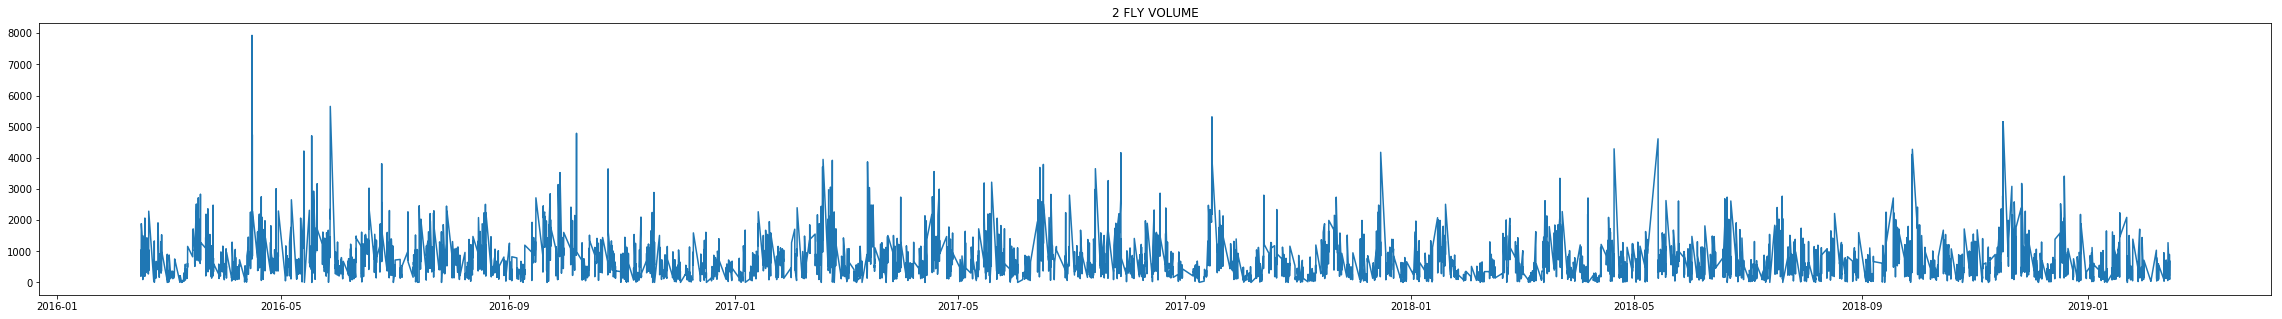

########################################################################################################################################################################################################
3 FLY


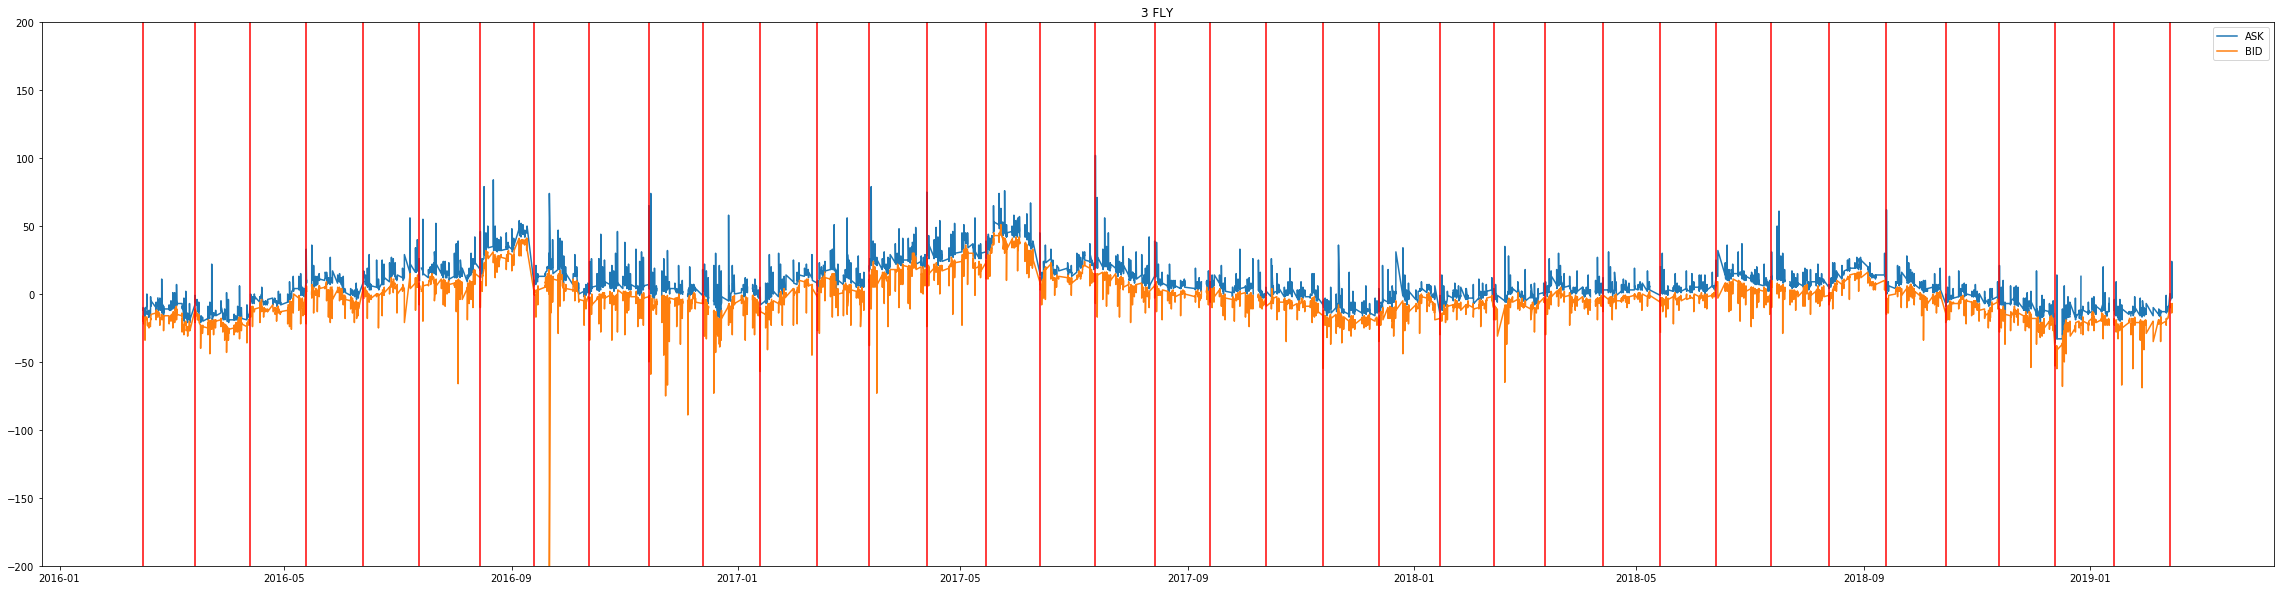

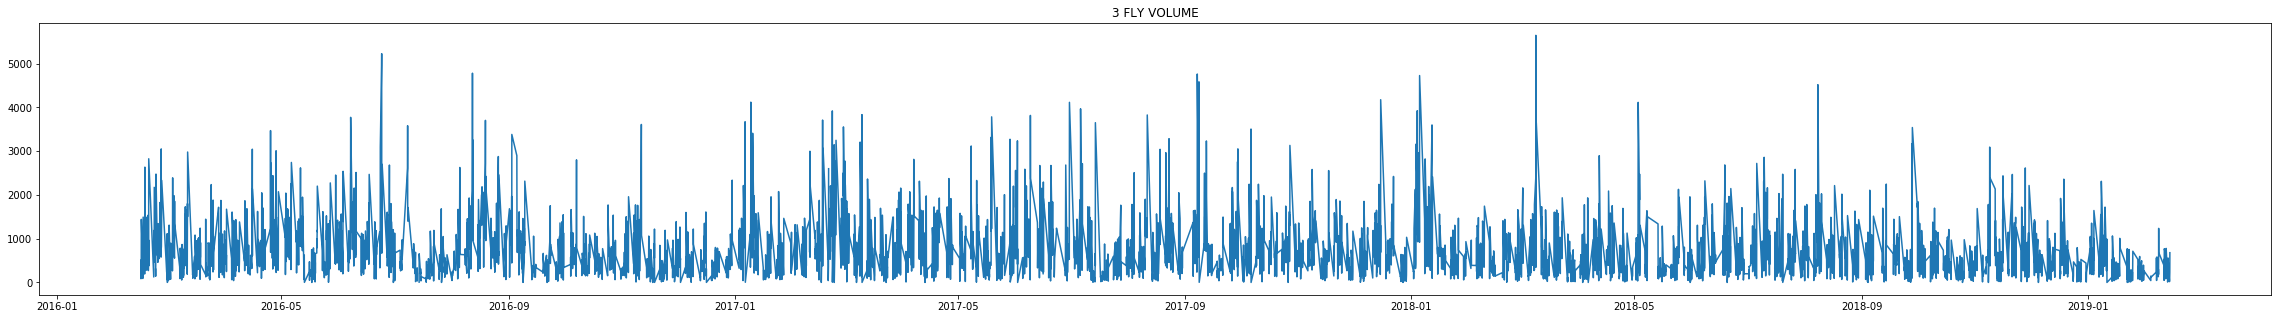

########################################################################################################################################################################################################
4 FLY


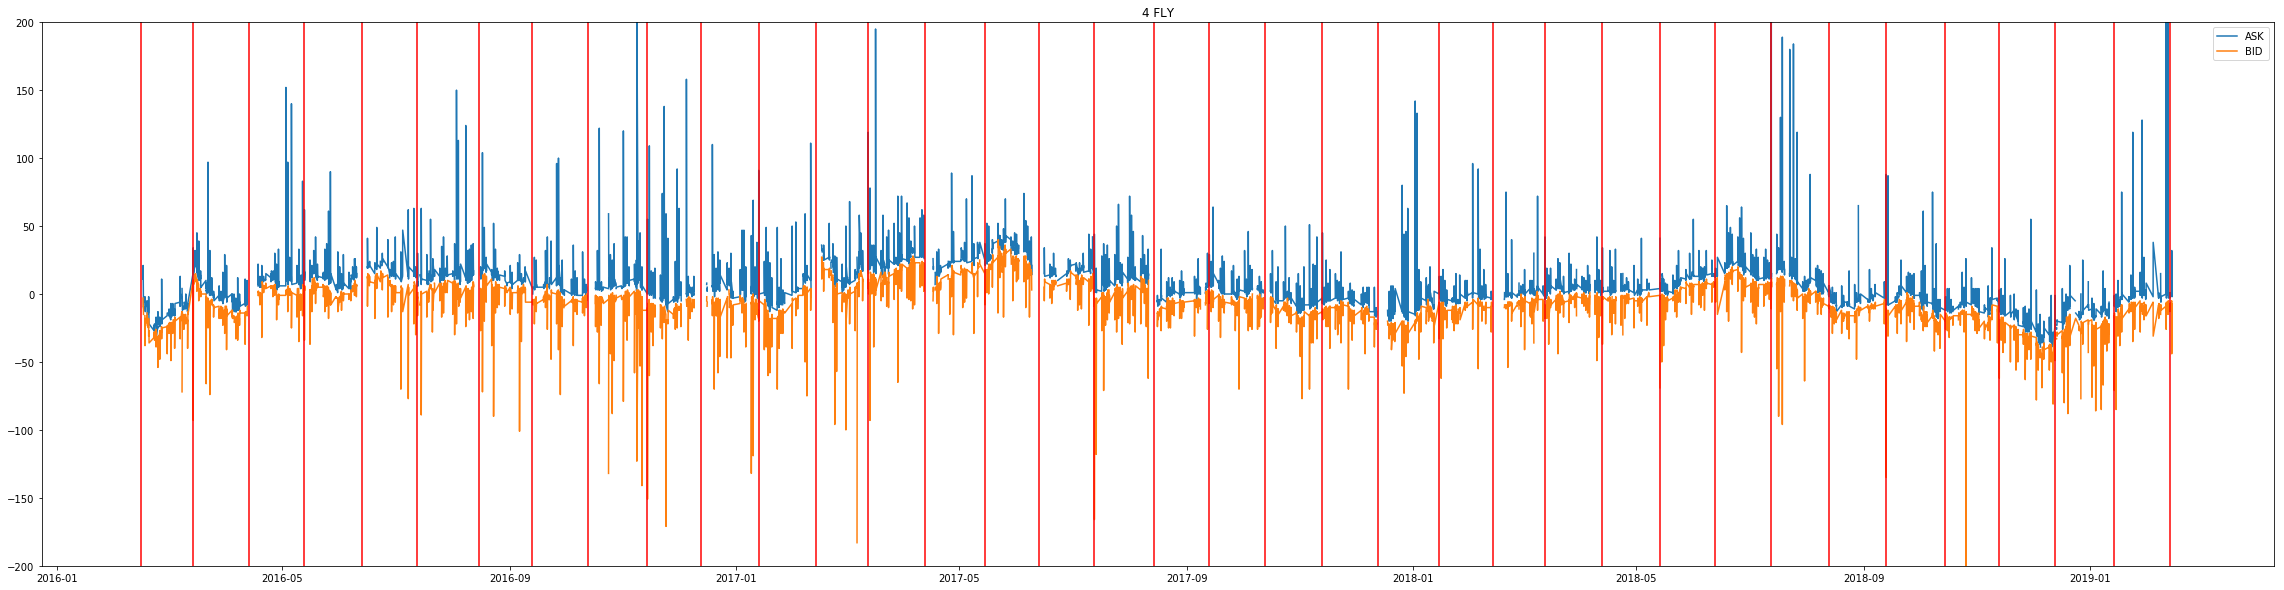

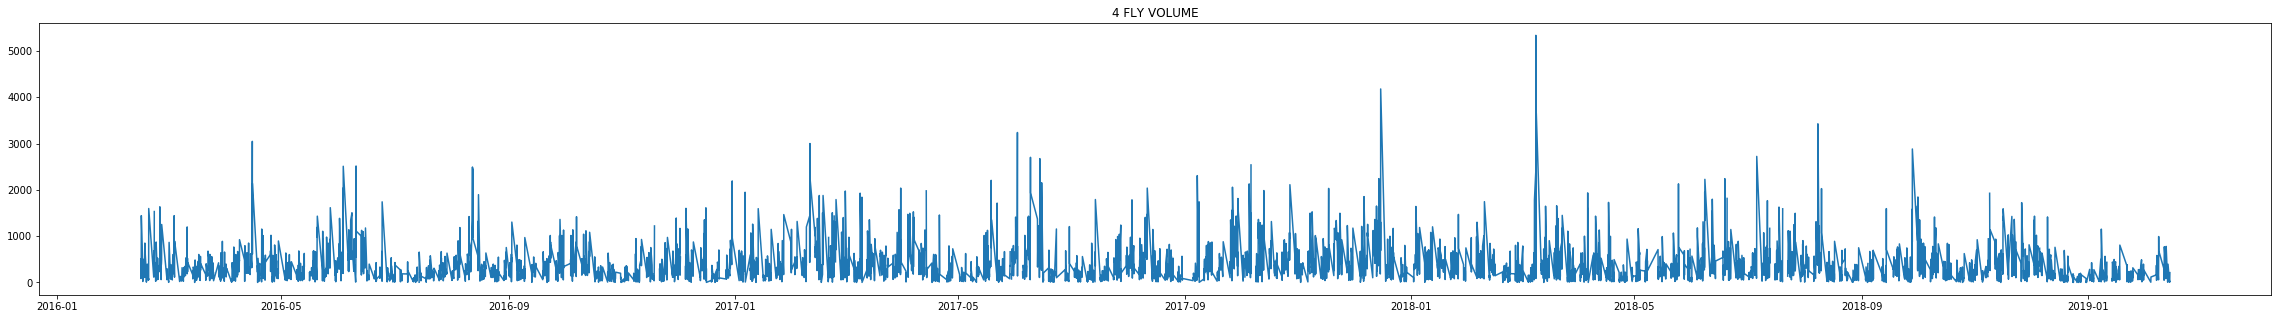

In [6]:
for phase in range(1,5):
    print('#'*200)
    fly_name=(str(phase)+' '+'FLY')
    print(fly_name)

    a_1="Close Ask"+str(phase)+"_"
    b_1="Close Bid"+str(phase)+"_"
    a_2="Close Ask"+str(phase+1)+"_"
    b_2="Close Bid"+str(phase+1)+"_"
    a_3="Close Ask"+str(phase+2)+"_"
    b_3="Close Bid"+str(phase+2)+"_"
    v_1="Volume"+str(phase)+"_"
    v_2="Volume"+str(phase+1)+"_"
    v_3="Volume"+str(phase+2)+"_"
    plt.figure(figsize=(40,10))
    plt.title(fly_name)    
    plt.plot(FRAME[str(a_1)]-FRAME[str(b_2)]*2+FRAME[str(a_3)],label='ASK')
    plt.plot(FRAME[str(b_1)]-FRAME[str(a_2)]*2+FRAME[str(b_3)],label='BID')
    FRAME['VOL']=FRAME[[str(v_1),str(v_2),str(v_3)]].min(axis=1)
    my_ind=FRAME['CCT'][FRAME['CCT']>0].index
    for line in my_ind:
        plt.axvline(line, color='r', linestyle='-')
    plt.ylim((-200,200))
    plt.legend()
    plt.show()


    plt.figure(figsize=(40,5))
    plt.title(str(fly_name)+" VOLUME")
    plt.plot(FRAME['VOL'])
    plt.show()

## PALM SPREADS


########################################################################################################################################################################################################
1 SPEAD


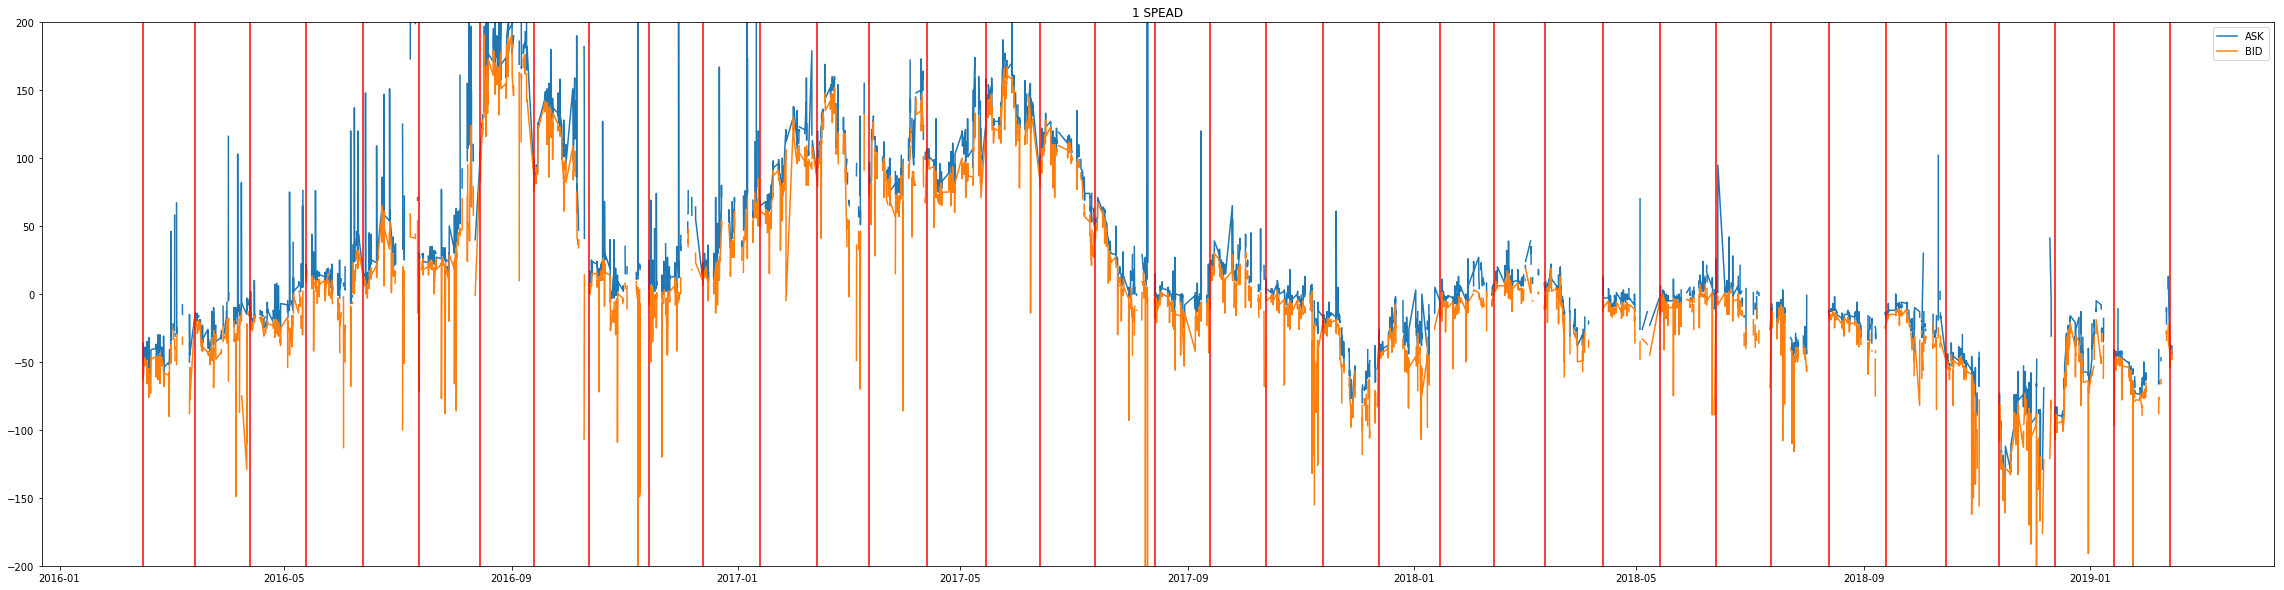

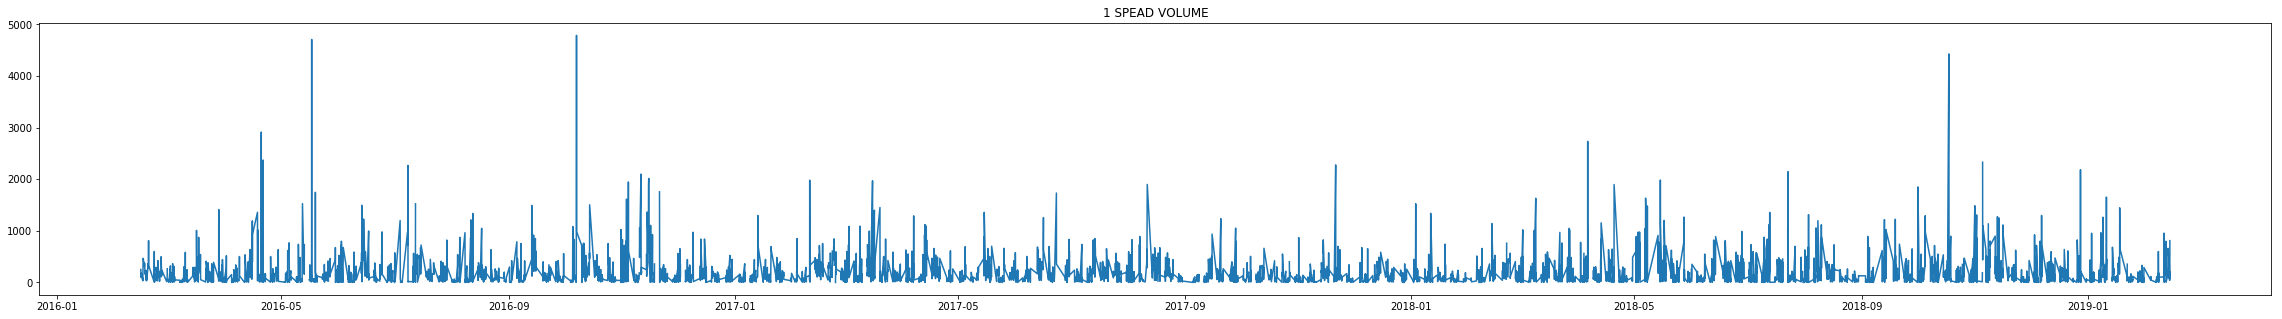

########################################################################################################################################################################################################
2 SPEAD


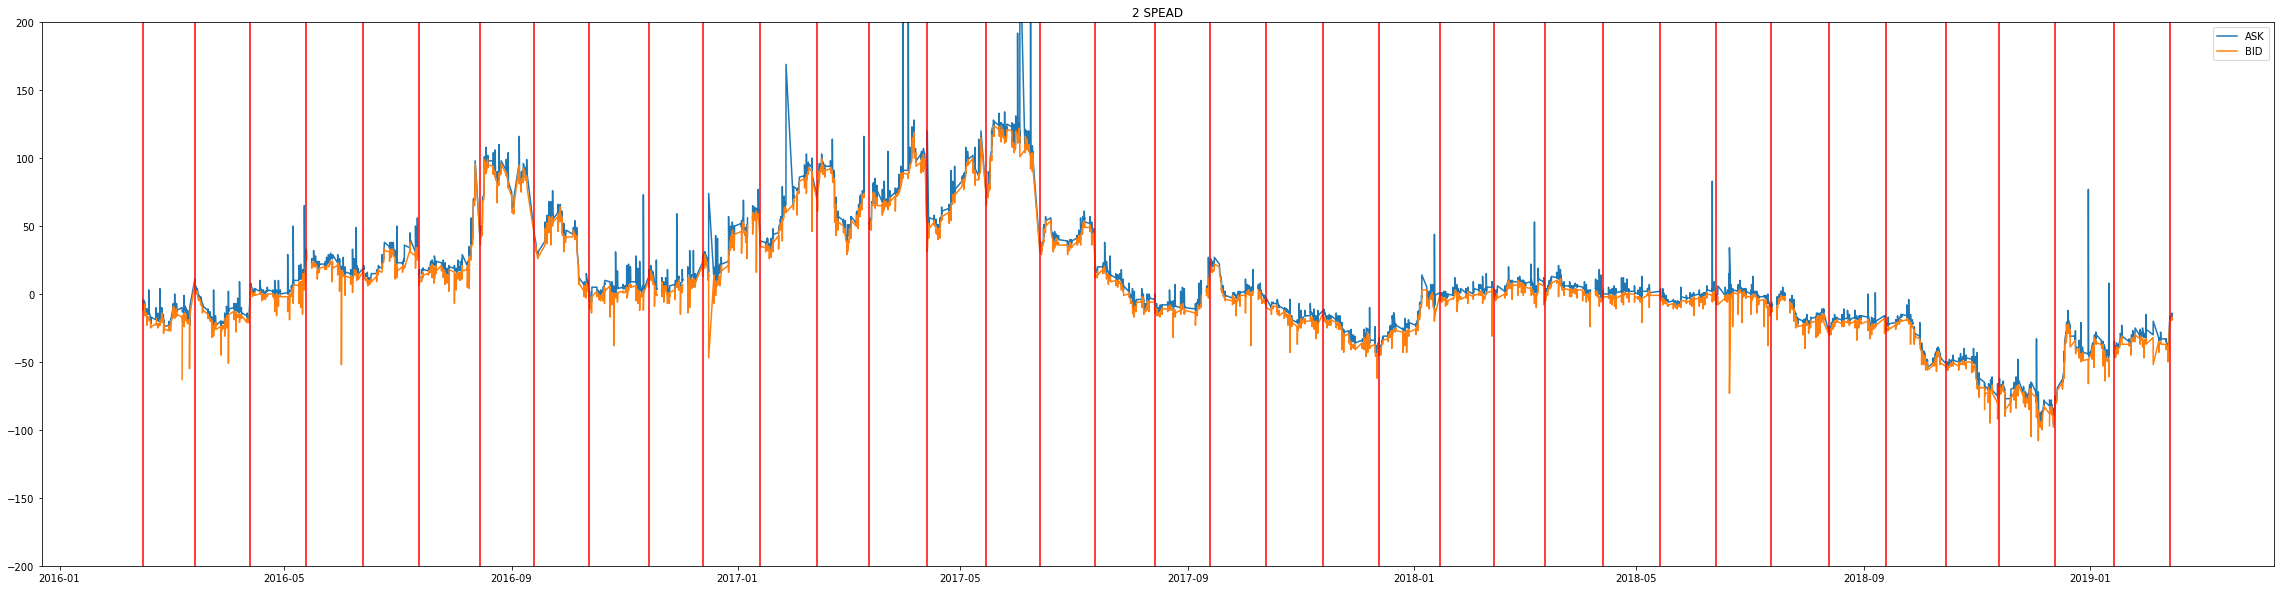

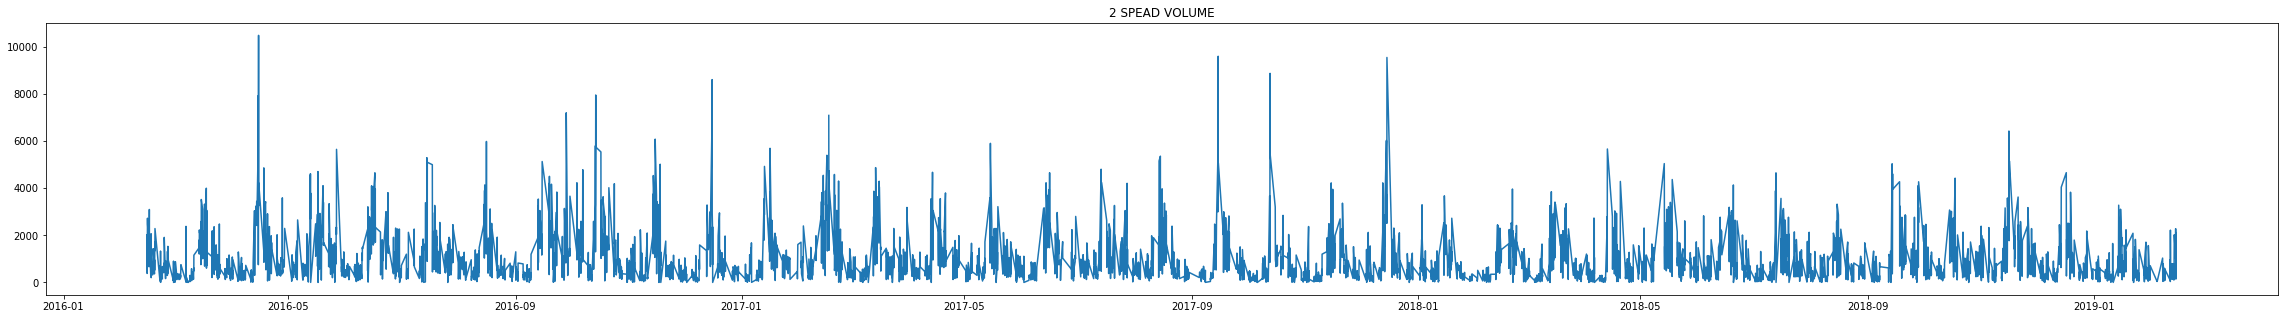

########################################################################################################################################################################################################
3 SPEAD


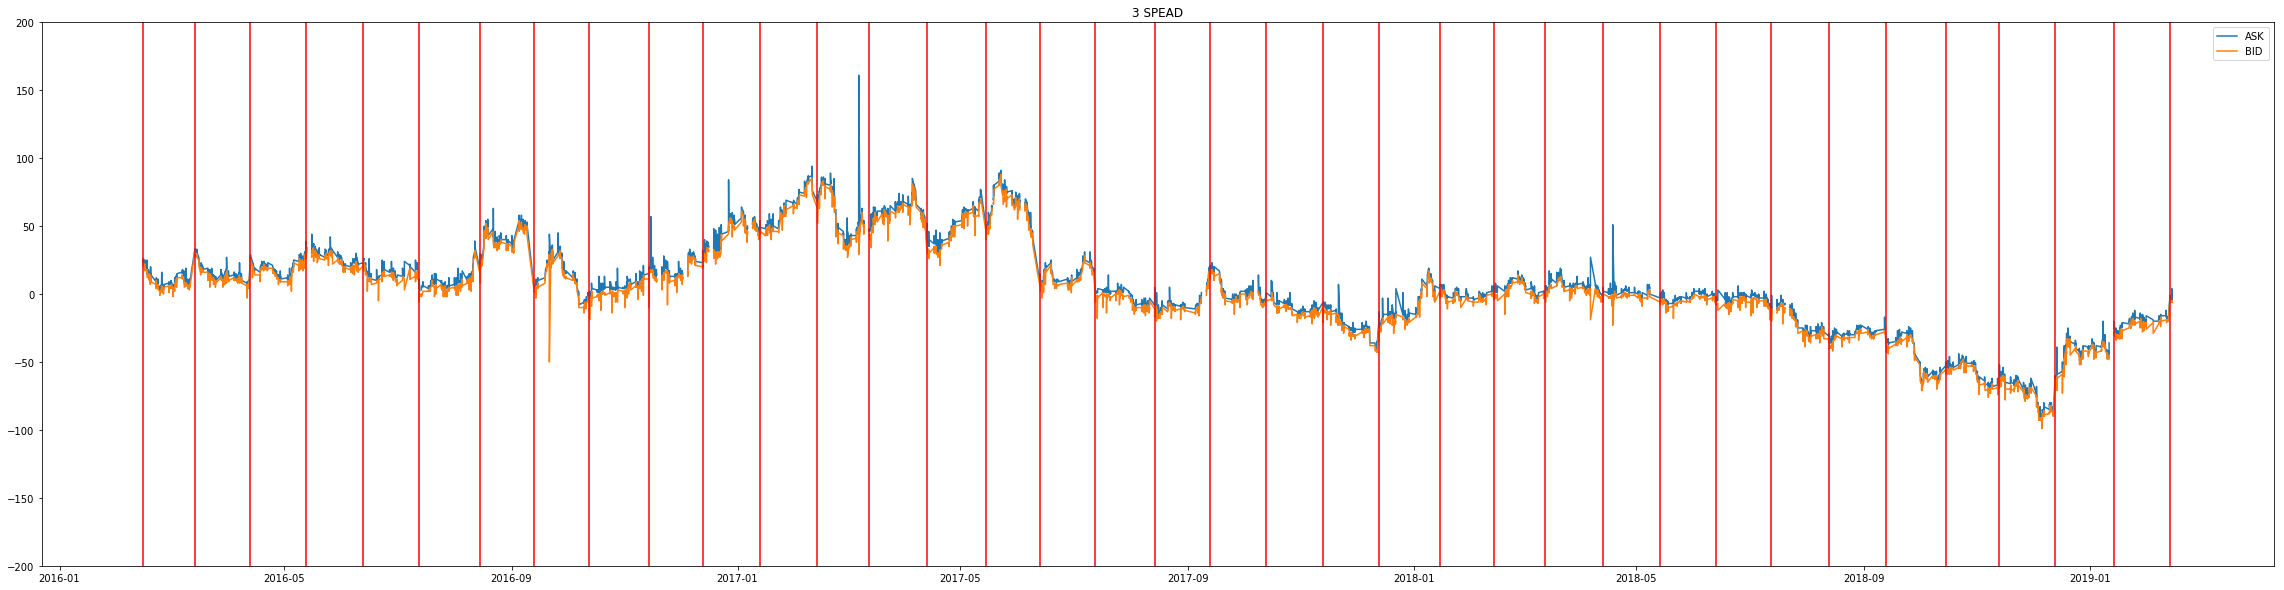

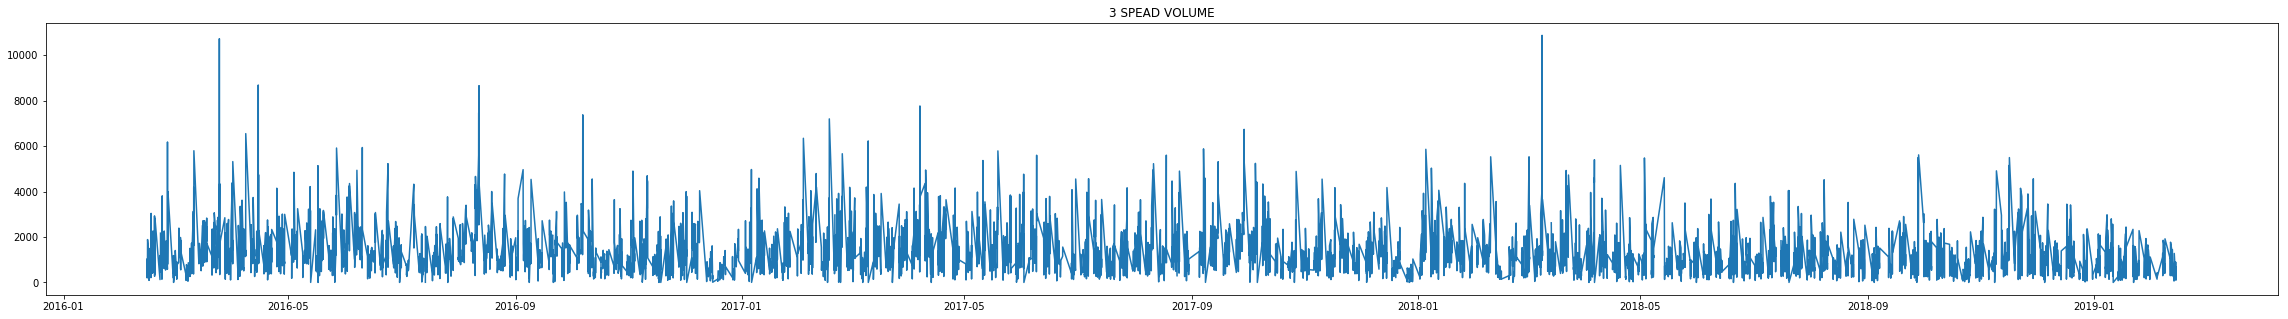

########################################################################################################################################################################################################
4 SPEAD


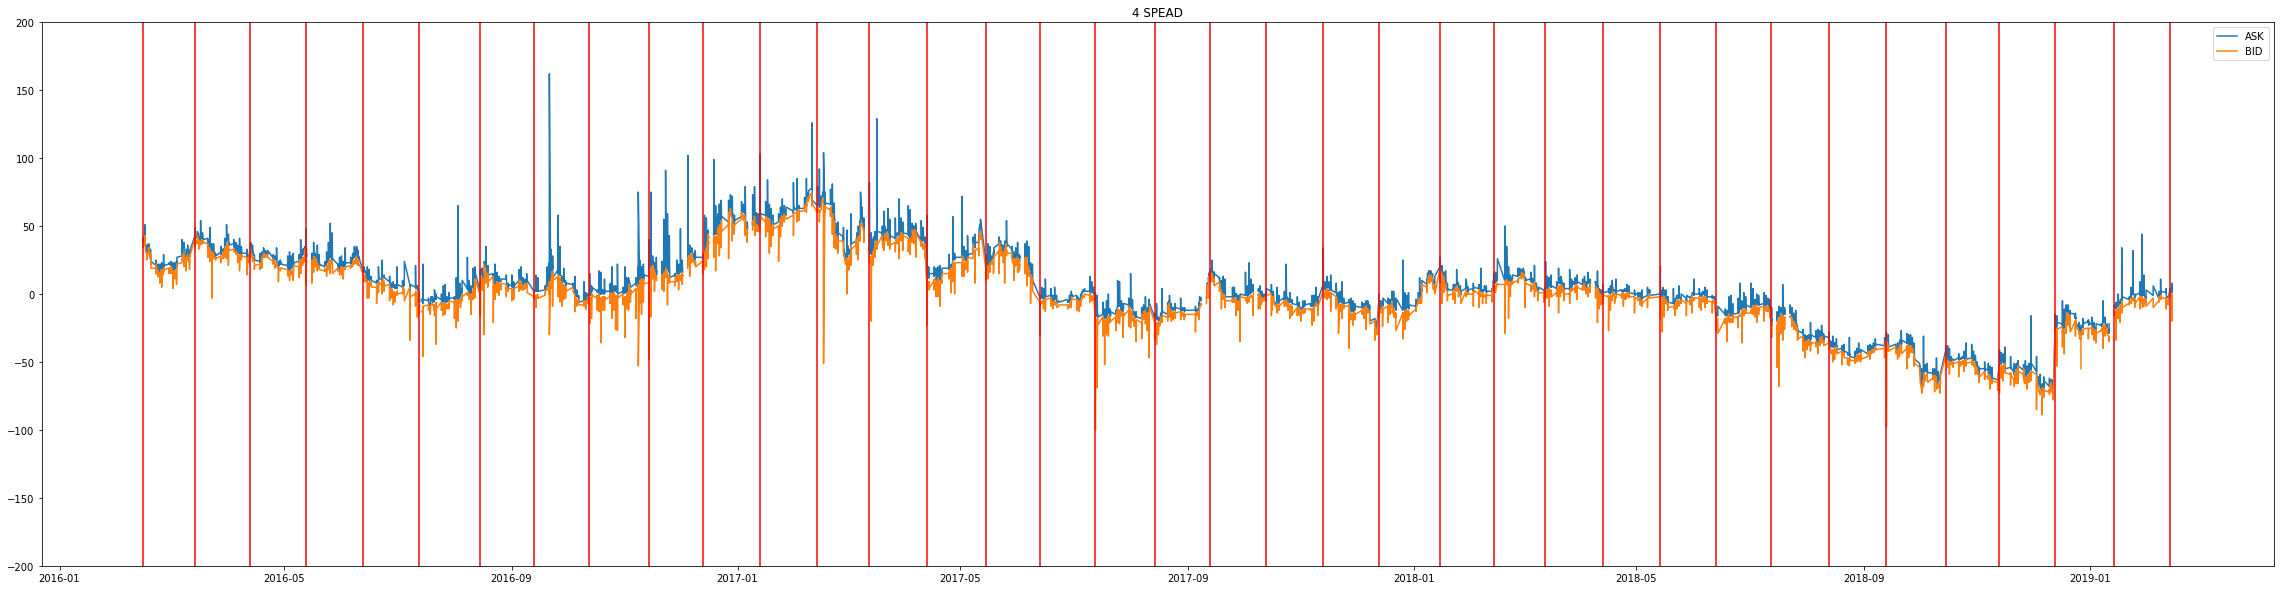

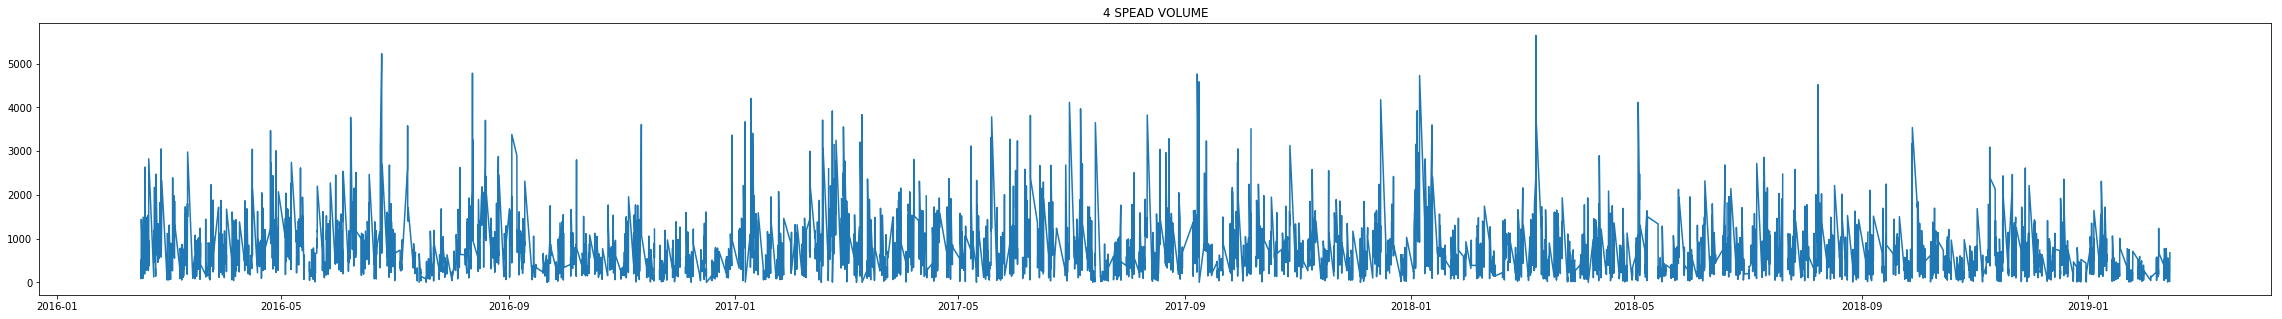

In [7]:
for phase in range(1,5):
    print('#'*200)
    fly_name=(str(phase)+' '+'SPEAD')
    print(fly_name)

    a_1="Close Ask"+str(phase)+"_"
    b_1="Close Bid"+str(phase)+"_"
    a_2="Close Ask"+str(phase+1)+"_"
    b_2="Close Bid"+str(phase+1)+"_"
    a_3="Close Ask"+str(phase+2)+"_"
    b_3="Close Bid"+str(phase+2)+"_"
    v_1="Volume"+str(phase)+"_"
    v_2="Volume"+str(phase+1)+"_"
    v_3="Volume"+str(phase+2)+"_"
    plt.figure(figsize=(40,10))
    plt.title(fly_name)    
    plt.plot(FRAME[str(a_1)]-FRAME[str(b_2)],label='ASK')
    plt.plot(FRAME[str(b_1)]-FRAME[str(a_2)],label='BID')
    FRAME['VOL']=FRAME[[str(v_1),str(v_2)]].min(axis=1)
    my_ind=FRAME['CCT'][FRAME['CCT']>0].index
    for line in my_ind:
        plt.axvline(line, color='r', linestyle='-')
    plt.ylim((-200,200))
    plt.legend()
    plt.show()


    plt.figure(figsize=(40,5))
    plt.title(str(fly_name)+" VOLUME")
    plt.plot(FRAME['VOL'])
    plt.show()

In [8]:
PALM_EXPIRY=FRAME[[x for x in FRAME.columns if '_PALM' in x]]
for col in PALM_EXPIRY.columns:
    my_name=col.replace('_PALM','_SOY')
    PALM_EXPIRY[my_name]=PALM_EXPIRY[col].str.replace('1FCPO','1BO')
glob_con=[]
for x in range(len(PALM_EXPIRY)):
    slice=PALM_EXPIRY.iloc[x,:]
    
    vals=(slice[[x for x in PALM_EXPIRY.columns if '_SOY' in x]].values)
    no_contract=['F','H','K','N','Q','U','V','Z']
    '''
    Code	Month
    F	January
    H	March
    K	May
    N	July
    Q	August
    U	September
    V	October
    Z	December
    '''
    con_list=[]
    for val in vals:
        if val[3] in no_contract:
            con_list.append(val)
    glob_con.append(con_list)
glob_con=[x[:4] for x in glob_con]   
FRAME['1_SOY']=[x[0] for x in glob_con]
FRAME['2_SOY']=[x[1] for x in glob_con]
FRAME['3_SOY']=[x[2] for x in glob_con]
FRAME['4_SOY']=[x[3] for x in glob_con]

SOY_DATA=pd.read_csv('SOYBEANOIL_UTC_H1.csv.gz').dropna()
SOY_DATA['DATETIME']=SOY_DATA['Date-Time'].map(str)
SOY_DATA=SOY_DATA[['#RIC','Volume','Close Bid','Close Ask','DATETIME']]
SOY_DATA["DATE"]=SOY_DATA["DATETIME"].str.split('T',expand=True)[0]
SOY_DATA["TIME"]=SOY_DATA["DATETIME"].str.split('T',expand=True)[1]
SOY_DATA["TIME"]=SOY_DATA["TIME"].str.split('.',expand=True)[0]
SOY_DATA['DATETIMEZ']=pd.to_datetime(SOY_DATA['DATE'] + ' ' + SOY_DATA['TIME'])
SOY_DATA=SOY_DATA.drop(['DATE','TIME','DATETIME'],axis=1)

FRAME=FRAME.reset_index()
FRAME['TIME']=FRAME['TIME'].map(str)
SOY_DATA['DATETIMEZ']=SOY_DATA['DATETIMEZ'].map(str)

for x in range(1,5):
    FRAME['INDS_'+str(x)]=FRAME[str(x)+'_SOY']+'_'+FRAME['TIME']
SOY_DATA['INDS']=SOY_DATA['#RIC']+'_'+SOY_DATA['DATETIMEZ']
SOY_DATA=SOY_DATA.set_index(['INDS'])
#PALM_DATA=PALM_DATA.drop(['#RIC','DATETIMEZ'],axis=1)




for x in range(1,5):

    FRAME=FRAME.set_index(['INDS_'+str(x)])
    FRAME=FRAME.join(SOY_DATA,rsuffix=str(x)+'_S')
    FRAME=FRAME.reset_index(drop=True)

FRAME['TIME']=pd.to_datetime(FRAME['TIME'])  
FRAME=FRAME.reset_index()
FRAME=FRAME.set_index(['TIME'])

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


########################################################################################################################################################################################################
1 SPEAD


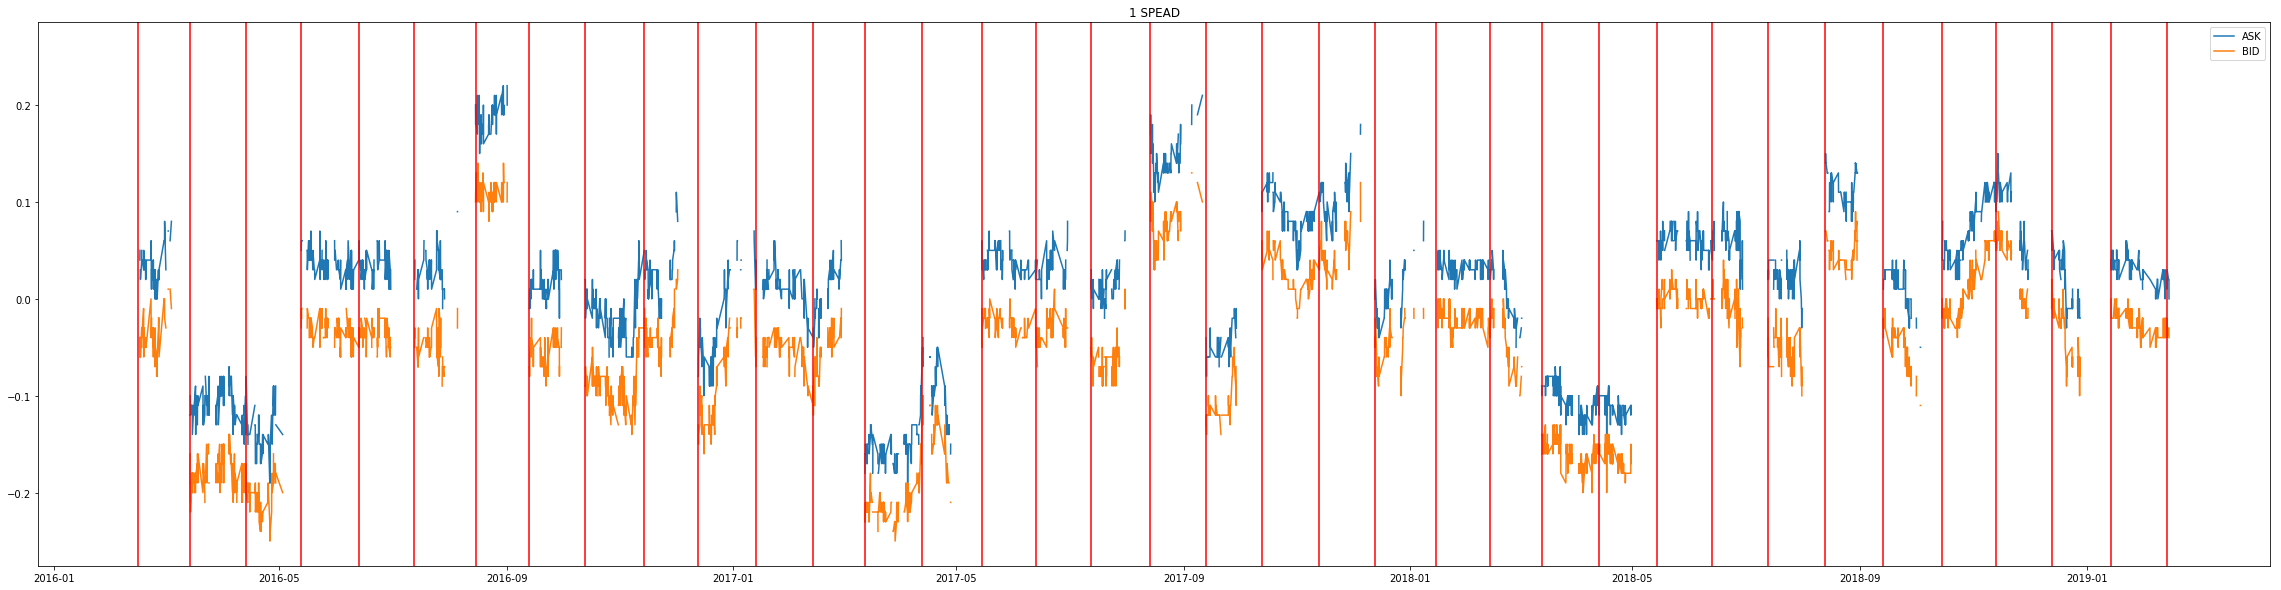

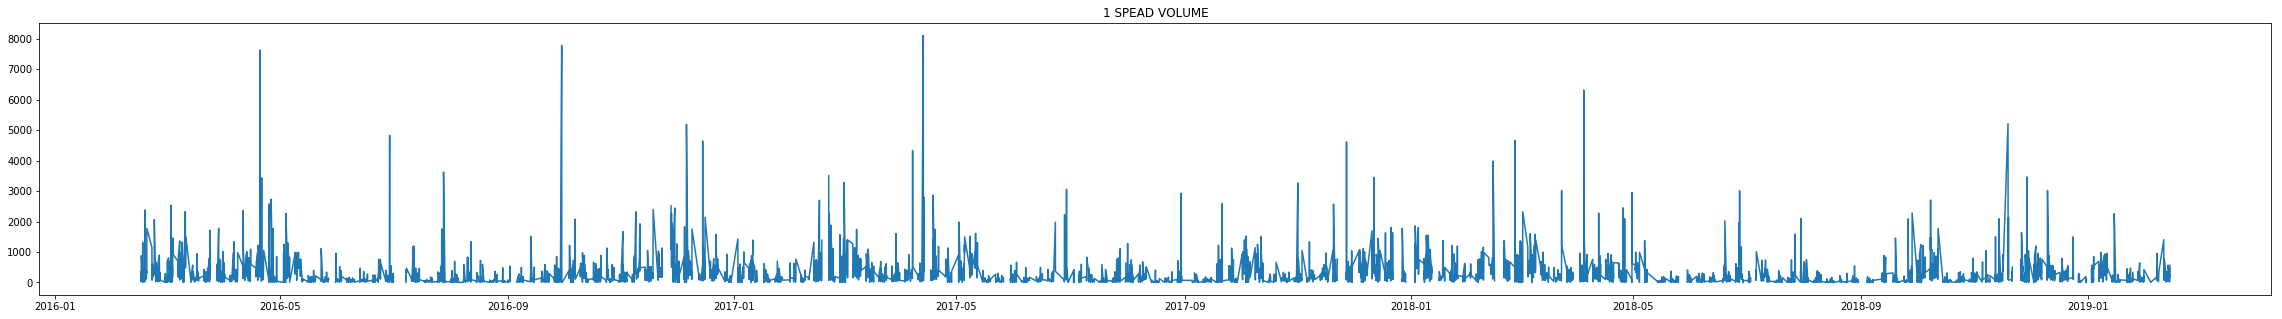

########################################################################################################################################################################################################
2 SPEAD


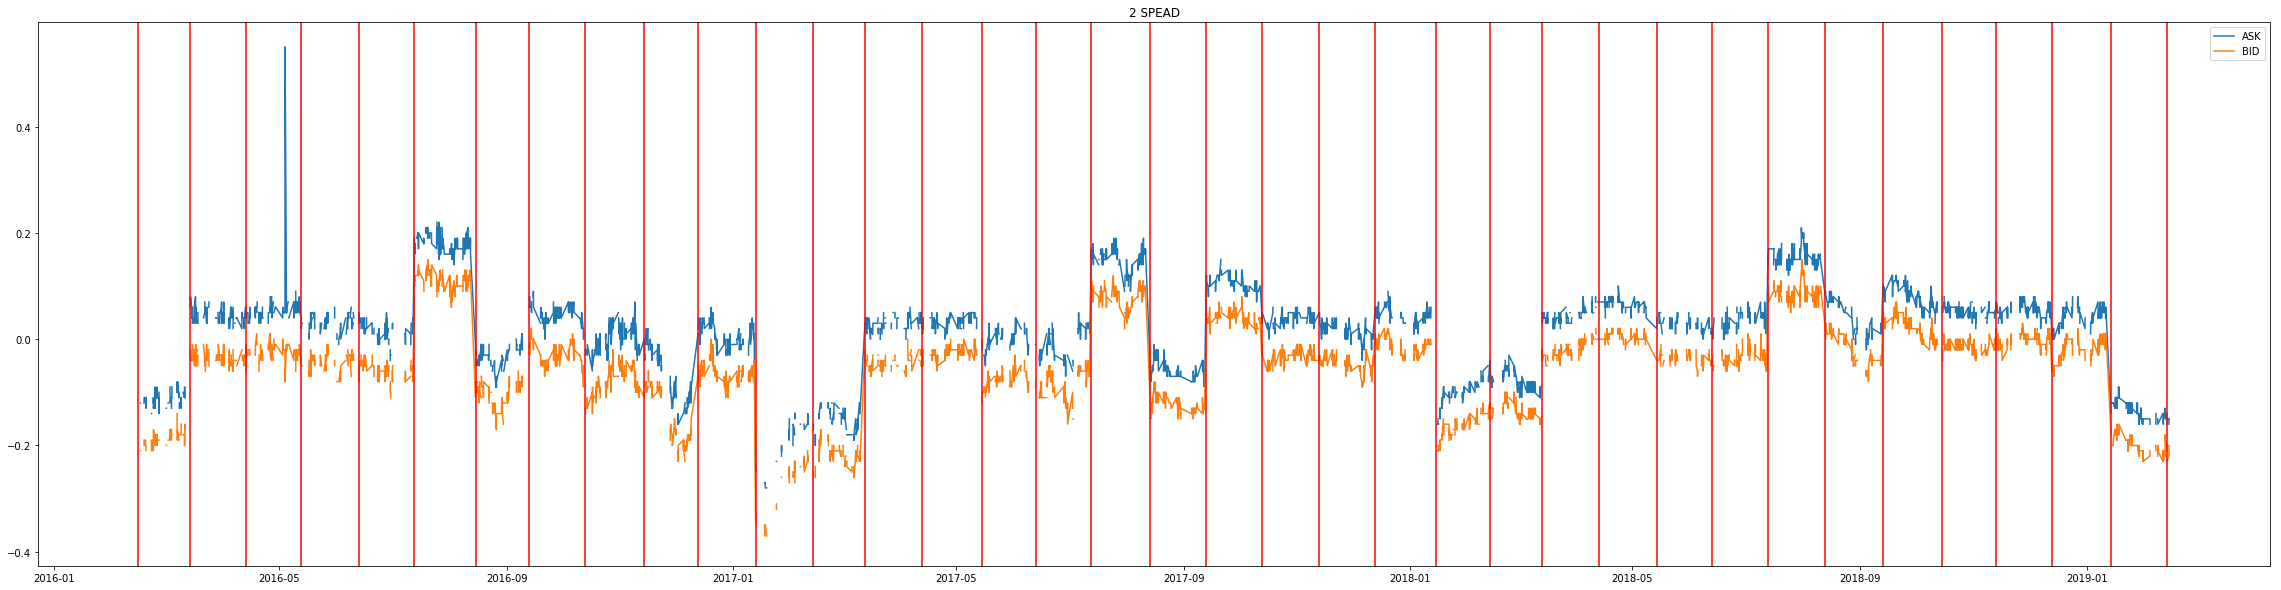

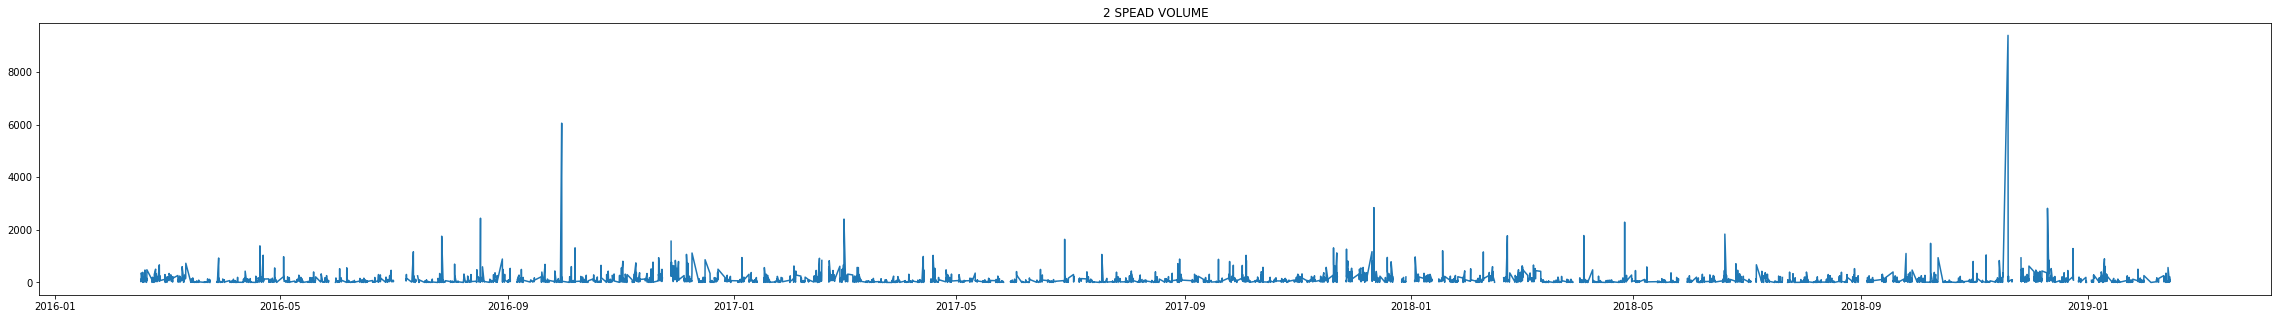

########################################################################################################################################################################################################
3 SPEAD


KeyError: 'Close Ask5_S'

In [31]:
for phase in range(1,4):
    print('#'*200)
    fly_name=(str(phase)+' '+'SPEAD')
    print(fly_name)

    a_1="Close Ask"+str(phase)+"_S"
    b_1="Close Bid"+str(phase)+"_S"
    a_2="Close Ask"+str(phase+1)+"_S"
    b_2="Close Bid"+str(phase+1)+"_S"
    a_3="Close Ask"+str(phase+2)+"_S"
    b_3="Close Bid"+str(phase+2)+"_S"
    v_1="Volume"+str(phase)+"_S"
    v_2="Volume"+str(phase+1)+"_S"
    v_3="Volume"+str(phase+2)+"_S"
    plt.figure(figsize=(40,10))
    plt.title(fly_name)    
    plt.plot(FRAME[str(a_1)]-FRAME[str(b_2)]*2+FRAME[str(a_3)],label='ASK')
    plt.plot(FRAME[str(b_1)]-FRAME[str(a_2)]*2+FRAME[str(b_3)],label='BID')
    FRAME['VOL']=FRAME[[str(v_1),str(v_2)]].min(axis=1)
    my_ind=FRAME['CCT'][FRAME['CCT']>0].index
    for line in my_ind:
        plt.axvline(line, color='r', linestyle='-')

    plt.legend()
    plt.show()


    plt.figure(figsize=(40,5))
    plt.title(str(fly_name)+" VOLUME")
    plt.plot(FRAME['VOL'])
    plt.show()

In [27]:
FRAME['Close Bid3_S']-FRAME['Close Bid4_S']

TIME
2016-02-15 02:00:00     NaN
2016-02-15 03:00:00     NaN
2016-02-15 04:00:00     NaN
2016-02-15 07:00:00     NaN
2016-02-15 08:00:00     NaN
2016-02-15 09:00:00     NaN
2016-02-16 02:00:00   -0.04
2016-02-16 03:00:00     NaN
2016-02-16 04:00:00     NaN
2016-02-16 07:00:00     NaN
2016-02-16 08:00:00   -0.04
2016-02-16 09:00:00   -0.04
2016-02-17 02:00:00     NaN
2016-02-17 03:00:00   -0.06
2016-02-17 04:00:00     NaN
2016-02-17 07:00:00     NaN
2016-02-17 08:00:00     NaN
2016-02-17 09:00:00   -0.06
2016-02-18 02:00:00     NaN
2016-02-18 03:00:00   -0.06
2016-02-18 04:00:00     NaN
2016-02-18 07:00:00   -0.07
2016-02-18 08:00:00   -0.06
2016-02-18 09:00:00   -0.06
2016-02-19 02:00:00     NaN
2016-02-19 03:00:00   -0.07
2016-02-19 04:00:00   -0.06
2016-02-19 07:00:00   -0.06
2016-02-19 08:00:00   -0.06
2016-02-19 09:00:00   -0.07
                       ... 
2019-02-08 08:00:00   -0.12
2019-02-08 09:00:00   -0.11
2019-02-11 02:00:00   -0.12
2019-02-11 03:00:00     NaN
2019-02-11 04:0


13%1

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
X=LOOK[[x for x in LOOK.columns if '_PALM' in x]]
    

In [ ]:
c_list=list(X.iloc[0])

In [ ]:
PALM_DATA=pd.read_csv("PALMOIL_UTC_H1.csv.gz")
PALM_DATA['DATETIME']=PALM_DATA['Date-Time'].map(str)
PALM_DATA=PALM_DATA[['#RIC','Volume','Close Bid','Close Ask','DATETIME']]
PALM_DATA["DATE"]=PALM_DATA["DATETIME"].str.split('T',expand=True)[0]
PALM_DATA["TIME"]=PALM_DATA["DATETIME"].str.split('T',expand=True)[1]
PALM_DATA["TIME"]=PALM_DATA["TIME"].str.split('.',expand=True)[0]
PALM_DATA['DATETIMEZ']=pd.to_datetime(PALM_DATA['DATE'] + ' ' + PALM_DATA['TIME'])
PALM_DATA=PALM_DATA.drop(['DATE','TIME','DATETIME'],axis=1)
